# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhamad Fahmi Ammar
- **Email:** muh.fahmi.2001@gmail.com
- **ID Dicoding:** pamong_ammar

Melihat dari kumpulan data-data tersebut, terdapat data-data yang mungkun saya analisis :
1. Data Customer
2. Data Persebaran penjualan produk
3. Data Pemesanan
4. Data Pembayaran
5. Data Review Produk
6. Data Produk
7. Data Penjual

#### Focus
Dari data-data diatas, saya memilih untuk berfokus pada :
1. Bagaimana Persebaran Pembeli dan Penjual pada Shopmi?
2. Bagaimana Perkembangan Penjualan pada Shopmi?
3. Apa yang mempengaruhi Perkembangan Penjualan?
4. Apa yang harus dilakukan dalam meningkatkan penjualan di Shopmi?


# Data Analyst Shopmi
Shopmi merupakan Ecommerce terkemuka yang didirikan oleh Fahmi. Terdapat penjual yang menjual barangnya di Shopmi, dan seorang pembeli yang memilih kebutuhan barangnya di shopmi.

## 1. Pre-Analyst
Sebelum membuat pertanyaan, saya perlu mengenali setiap data yang didapatkan dari dataset. Sehingga dalam hal itu, saya mengetahui ruang lingkup yang dapat dilakukan untuk menganalisis nya.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sn

In [2]:
dataset = os.listdir('dataset')
dataset

['customers_dataset.csv',
 'geolocation_dataset.csv',
 'orders_dataset.csv',
 'order_items_dataset.csv',
 'order_payments_dataset.csv',
 'order_reviews_dataset.csv',
 'products_dataset.csv',
 'product_category_name_translation.csv',
 'sellers_dataset.csv']

## 2. Data Wrangling

### A. Data Customer
Saya melakukan penghapusan terhadap customer unique id dan customer zip code yang bukan fokus saya dalam analisis. Selain itu, saya melakukan pengecekan data incompletely, dan data duplicate.

### Gathering Data

In [3]:
df_customer = pd.read_csv('dataset/'+dataset[0])
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Assessing Data

In [4]:
df_customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
df_customer.duplicated().sum()

0

### Cleaning Data

In [6]:
df_customer.drop('customer_unique_id', axis=1,inplace=True)
df_customer.drop('customer_zip_code_prefix', axis=1, inplace=True)

### B. Data Geolocation
Saya melakukan penghapusan terhadap koordinat lokasi dan zip code yang tidak saya analisis. Kemudian saya mengecek data Nan. Akibat dari penghapusan tersebut banyak data yang terdeteksi duplikat sehingga saya menghapus duplikat tersebut.

### Gathering Data

In [7]:
df_geolocation = pd.read_csv('dataset/'+dataset[1])
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

In [8]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [9]:
df_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [10]:
df_geolocation.duplicated().sum()

261831

### Cleaning Data

In [11]:
df_geolocation.drop('geolocation_zip_code_prefix', axis=1, inplace=True)
df_geolocation.drop('geolocation_lat', axis=1, inplace=True)
df_geolocation.drop('geolocation_lng', axis=1, inplace=True)

In [12]:
df_geolocation.drop_duplicates(inplace=True)

In [13]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8463 entries, 0 to 1000046
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   geolocation_city   8463 non-null   object
 1   geolocation_state  8463 non-null   object
dtypes: object(2)
memory usage: 198.4+ KB


### C. Data Orders
Pada data Orders, Saya menghapus data order approved, saya menghapus data Nan, dan saya juga mengubah tipe data datetime pada data yang bersangkutan dengan waktu. Saya juga mengubah tipedata status delivery menjadi category

### Gathering Data

In [14]:
df_orders = pd.read_csv('dataset/'+dataset[2])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### Assessing Data

In [15]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [16]:
df_orders[(df_orders.order_delivered_carrier_date.isna()) & (df_orders.order_delivered_customer_date.isna())].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1782 entries, 6 to 99415
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       1782 non-null   object
 1   customer_id                    1782 non-null   object
 2   order_status                   1782 non-null   object
 3   order_purchase_timestamp       1782 non-null   object
 4   order_approved_at              1636 non-null   object
 5   order_delivered_carrier_date   0 non-null      object
 6   order_delivered_customer_date  0 non-null      object
 7   order_estimated_delivery_date  1782 non-null   object
dtypes: object(8)
memory usage: 125.3+ KB


### Cleaning Data

In [17]:
df_orders.drop('order_approved_at', axis=1, inplace=True)

In [18]:
df_orders.dropna(inplace=True)

In [19]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
edit_columns = ['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for columns in edit_columns:
    df_orders[columns] = pd.to_datetime(df_orders[columns])

In [21]:
df_orders.order_status = df_orders.order_status.astype('category')

In [22]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96475 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96475 non-null  object        
 1   customer_id                    96475 non-null  object        
 2   order_status                   96475 non-null  category      
 3   order_purchase_timestamp       96475 non-null  datetime64[ns]
 4   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 5   order_delivered_customer_date  96475 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96475 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](4), object(2)
memory usage: 5.2+ MB


### D. Data Order by Item
Pada data order by Item, saya mengecek tidak ada data Nan, tidak ada data duplikat. Untuk lebih mudah, saya membuat data total yang berasal dari nilai price dijumlahkan degnan nilai freight value.

### Gathering Data

In [23]:
df_order_item = pd.read_csv('dataset/'+dataset[3])
df_order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assesing Data

In [24]:
df_order_item.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [25]:
df_order_item.duplicated().sum()

0

In [26]:
df_order_item['total_price'] = df_order_item['price'] + df_order_item['freight_value']

In [27]:
df_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
 7   total_price          112650 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.9+ MB


### Cleaning Data

### E. Data Order Review
Pada Data order Review, saya mengecek terdapat nilai Nan pada judul komentar dan isi komentar. Karena saya hanya membutuhkan order id dan review score, saya menghapus data yang lainnya. Tujuannya adalah saya ingin menganalisa Review Scorenya.

### Gathering Data

In [28]:
df_order_review = pd.read_csv('dataset/'+dataset[5])
df_order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assessing Data

In [29]:
df_order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [30]:
df_order_review.duplicated().sum()

0

In [31]:
df_order_review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

### Cleaning Data

In [32]:
df_order_review.drop('review_comment_title', axis=1, inplace=True)
df_order_review.drop('review_comment_message', axis=1, inplace=True)
df_order_review.drop('review_creation_date', axis=1, inplace=True)
df_order_review.drop('review_answer_timestamp', axis=1, inplace=True)
df_order_review.drop('review_id', axis=1, inplace=True)
df_order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      99224 non-null  object
 1   review_score  99224 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [33]:
df_order_review['review_score'] = df_order_review['review_score'].astype('category')

### F. Data Produk
Pada Data Produk, detail produk tidak digunakan sepenuhnya, hanya saja pada category dan produk id akan digunakan sebagai patokan produk yang dijual oleh penjual SHopmi. Saya mengisi nilai Nan dengan Uncategory, dikarenakan data Nan tersebut masih bisa digunakan untuk analisis

### Gathering Data

In [34]:
df_product = pd.read_csv('dataset/'+dataset[6])
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

In [35]:
df_product.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

### Cleaning Data

In [36]:
delete_column = df_product.columns[2:]
df_product = df_product.drop(columns=delete_column, axis=1)


In [37]:
df_product.fillna('uncategory', inplace=True)

In [38]:
df_product.isna().sum()

product_id               0
product_category_name    0
dtype: int64

### G. Data Penjual
Pada data penjual, saya mengecek tidak ada nilai Nan dan duplikat. Karena saya tidak menggunakan zip_code seperti pada geolocation, saya menghapusnya.

### Gathering Data

In [39]:
df_seller = pd.read_csv('dataset/'+dataset[8])
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [40]:
df_seller.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [41]:
df_seller.duplicated().sum()

0

### Cleaning Data

In [42]:
df_seller.drop('seller_zip_code_prefix', axis=1, inplace=True)

In [43]:
df_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_id     3095 non-null   object
 1   seller_city   3095 non-null   object
 2   seller_state  3095 non-null   object
dtypes: object(3)
memory usage: 72.7+ KB


## 3. EDA
Berdasarkan Data Wrangling sebelumnya, Data yang digunakan menjadi 6 data. Dimana 6 data ini siap dilakukan analisis. Data payment dan data category translation English saya buang karena data tersebut tidak menjadi fokus pada analisis ini.

In [44]:
remove_data  = ['geolocation_dataset.csv','product_category_name_translation.csv', 'order_payments_dataset.csv']
for data in dataset:
    if data in remove_data:
        dataset.remove(data)
dataset

['customers_dataset.csv',
 'orders_dataset.csv',
 'order_items_dataset.csv',
 'order_reviews_dataset.csv',
 'products_dataset.csv',
 'sellers_dataset.csv']

### A. EDA Data Customer

In [45]:
df_customer.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


In [46]:
df_customer.groupby('customer_city').customer_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64

In [47]:
df_customer.groupby('customer_state').customer_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: customer_id, dtype: int64

### B. EDA Data Orders

In [48]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [49]:
df_orders.groupby('order_status').order_id.nunique().reset_index().sort_values('order_id', ascending=False)

,order_status,order_id
1,delivered,96469
0,canceled,6


In [50]:
df_orders['time_delivery_difference'] = (df_orders['order_delivered_customer_date'] - df_orders['order_delivered_carrier_date']).dt.days

In [51]:
def delivery_time(x):
    if x>0:
        return 'Fast'
    elif x<0:
        return 'Late'
    else:
        return 'On Time'
    
late_or_no = (df_orders['order_estimated_delivery_date'] - df_orders['order_delivered_customer_date']).dt.days
df_orders['delivery_status'] = late_or_no.apply(delivery_time)


In [52]:
df_orders['delivery_status'] = df_orders['delivery_status'].astype('category')
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96475 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96475 non-null  object        
 1   customer_id                    96475 non-null  object        
 2   order_status                   96475 non-null  category      
 3   order_purchase_timestamp       96475 non-null  datetime64[ns]
 4   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 5   order_delivered_customer_date  96475 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96475 non-null  datetime64[ns]
 7   time_delivery_difference       96475 non-null  int64         
 8   delivery_status                96475 non-null  category      
dtypes: category(2), datetime64[ns](4), int64(1), object(2)
memory usage: 6.1+ MB


In [53]:
df_orders.groupby('delivery_status').order_id.nunique().reset_index().sort_values('order_id', ascending=False)

,delivery_status,order_id
0,Fast,87187
1,Late,7826
2,On Time,1462


In [54]:
df_orders.groupby('time_delivery_difference').order_id.nunique().reset_index().sort_values('time_delivery_difference', ascending=False).head(10)

,time_delivery_difference,order_id
144,205,1
143,195,1
142,194,1
141,190,1
140,188,1
139,187,1
138,186,1
137,182,2
136,181,2
135,180,1


In [55]:
df_orders.groupby('time_delivery_difference').order_id.nunique().reset_index().sort_values('time_delivery_difference', ascending=True).head(10)

,time_delivery_difference,order_id
0,-17,1
1,-8,2
2,-7,1
3,-6,3
4,-5,1
5,-3,1
6,-2,7
7,-1,7
8,0,2684
9,1,7881


### C. EDA Orders by Item

In [56]:
df_order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


In [57]:
df_order_item.groupby('seller_id').price.sum().sort_values(ascending=False).reset_index().head(10)

,seller_id,price
0,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1,53243585a1d6dc2643021fd1853d8905,222776.05
2,4a3ca9315b744ce9f8e9374361493884,200472.92
3,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
4,7c67e1448b00f6e969d365cea6b010ab,187923.89
5,7e93a43ef30c4f03f38b393420bc753a,176431.87
6,da8622b14eb17ae2831f4ac5b9dab84a,160236.57
7,7a67c85e85bb2ce8582c35f2203ad736,141745.53
8,1025f0e2d44d7041d6cf58b6550e0bfa,138968.55
9,955fee9216a65b617aa5c0531780ce60,135171.70


In [58]:
df_order_item.groupby('seller_id').price.sum().sort_values(ascending=True).reset_index().head(10)

,seller_id,price
0,cf6f6bc4df3999b9c6440f124fb2f687,3.50
1,77128dec4bec4878c37ab7d6169d6f26,6.50
2,1fa2d3def6adfa70e58c276bb64fe5bb,6.90
3,702835e4b785b67a084280efca355756,7.60
4,34aefe746cd81b7f3b23253ea28bef39,8.00
5,ad14615bdd492b01b0d97922e87cb87f,8.25
6,4965a7002cca77301c82d3f91b82e1a9,8.49
7,0f94588695d71662beec8d883ffacf09,9.00
8,c18309219e789960add0b2255ca4b091,9.90
9,95cca791657aabeff15a07eb152d7841,9.99


In [59]:
df_order_item.groupby('product_id').total_price.sum().sort_values(ascending=True).reset_index().head(10)

,product_id,total_price
0,46fce52cef5caa7cc225a5531c946c8b,9.59
1,d51e0a7f437c0d14f560082ed007fd85,9.95
2,310dc32058903b6416c71faff132df9e,10.07
3,9334fc63bffa67f685c03b1dc24df180,10.48
4,47a83ac845f953b889154d9963dbc1f8,10.88
5,501c6da13fd2e5d497c42b29eeddc95d,10.88
6,0eeeb45e2f5911fd44282e5bb0c624ff,11.56
7,680cc8535be7cc69544238c1d6a83fe8,11.62
8,567f4f60d4e44c92dd00ecd0920ce6b1,11.82
9,5304ff3fa35856a156e1170a6022d34d,12.22


In [60]:
df_order_item.groupby('product_id').price.sum().sort_values(ascending=False).reset_index().head(10)

,product_id,price
0,bb50f2e236e5eea0100680137654686c,63885.00
1,6cdd53843498f92890544667809f1595,54730.20
2,d6160fb7873f184099d9bc95e30376af,48899.34
3,d1c427060a0f73f6b889a5c7c61f2ac4,47214.51
4,99a4788cb24856965c36a24e339b6058,43025.56
5,3dd2a17168ec895c781a9191c1e95ad7,41082.60
6,25c38557cf793876c5abdd5931f922db,38907.32
7,5f504b3a1c75b73d6151be81eb05bdc9,37733.90
8,53b36df67ebb7c41585e8d54d6772e08,37683.42
9,aca2eb7d00ea1a7b8ebd4e68314663af,37608.90


In [61]:
df_order_item.groupby('order_id').freight_value.sum().sort_values(ascending=False).reset_index().head(10)


,order_id,freight_value
0,cf4659487be50c0c317cff3564c4a840,1794.96
1,2455cbeb73fd04b170ca2504662f95ce,1002.29
2,cfed507ac357129f750f05a0d7d71b15,711.33
3,71dab1155600756af6de79de92e712e3,626.64
4,17784b9fbb37fb0bdc230d8ed6f6b355,502.98
5,725cf8e9c24e679a8a5a32cb92c9ce1e,497.42
6,5bd06bab48e0423fc35d1c236d48a6bb,497.08
7,be382a9e1ed25128148b97d6bfdb21af,479.28
8,c52c7fbe316b5b9d549e8a25206b8a1f,458.73
9,62073ec6b54b8e6322037fc0f3591ad3,456.47


In [62]:
df_order_item.groupby('order_id').total_price.sum().sort_values(ascending=False).reset_index().head(10)


,order_id,total_price
0,03caa2c082116e1d31e67e9ae3700499,13664.08
1,736e1922ae60d0d6a89247b851902527,7274.88
2,0812eb902a67711a1cb742b3cdaa65ae,6929.31
3,fefacc66af859508bf1a7934eab1e97f,6922.21
4,f5136e38d1a14a4dbd87dff67da82701,6726.66
5,2cc9089445046817a7539d90805e6e5a,6081.54
6,a96610ab360d42a2e5335a3998b4718a,4950.34
7,b4c4b76c642808cbe472a32b86cddc95,4809.44
8,199af31afc78c699f0dbf71fb178d4d4,4764.34
9,8dbc85d1447242f3b127dda390d56e19,4681.78


In [63]:
df_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
 7   total_price          112650 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.9+ MB


### D. EDA Data Reviews

In [64]:
df_order_review.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [65]:
df_order_review.groupby('review_score').order_id.nunique().sort_values(ascending=False)

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

In [66]:
df_order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   order_id      99224 non-null  object  
 1   review_score  99224 non-null  category
dtypes: category(1), object(1)
memory usage: 872.4+ KB


### E. EDA Data Product 

In [67]:
df_product.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [68]:
df_product.groupby('product_category_name').product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

### F. EDA Data Sellers

In [69]:
df_seller.head()

,seller_id,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP


In [70]:
df_seller.groupby('seller_city').seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [71]:
df_seller.groupby('seller_state').seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

 ### 3.1 EDA with Data Relation
 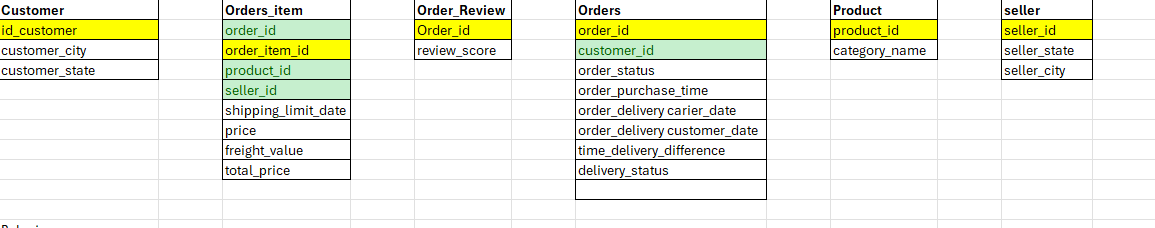

In [72]:
df_merge_order_item = pd.merge(
left=df_order_item,
right=df_orders,
how='right',
left_on='order_id',
right_on='order_id')

In [73]:
df_merge_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110195 entries, 0 to 110194
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110195 non-null  object        
 1   order_item_id                  110195 non-null  int64         
 2   product_id                     110195 non-null  object        
 3   seller_id                      110195 non-null  object        
 4   shipping_limit_date            110195 non-null  object        
 5   price                          110195 non-null  float64       
 6   freight_value                  110195 non-null  float64       
 7   total_price                    110195 non-null  float64       
 8   customer_id                    110195 non-null  object        
 9   order_status                   110195 non-null  category      
 10  order_purchase_timestamp       110195 non-null  datetime64[ns]
 11  

In [74]:
df_merge_order_review = pd.merge(
    left=df_merge_order_item,
    right=df_order_review,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
df_merge_order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110838 entries, 0 to 110837
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110838 non-null  object        
 1   order_item_id                  110838 non-null  int64         
 2   product_id                     110838 non-null  object        
 3   seller_id                      110838 non-null  object        
 4   shipping_limit_date            110838 non-null  object        
 5   price                          110838 non-null  float64       
 6   freight_value                  110838 non-null  float64       
 7   total_price                    110838 non-null  float64       
 8   customer_id                    110838 non-null  object        
 9   order_status                   110838 non-null  category      
 10  order_purchase_timestamp       110838 non-null  datetime64[ns]
 11  

In [75]:
df_merge_order_review['review_score'].fillna(df_merge_order_review['review_score'].mode()[0], inplace=True)


In [76]:
df_merge_order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110838 entries, 0 to 110837
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110838 non-null  object        
 1   order_item_id                  110838 non-null  int64         
 2   product_id                     110838 non-null  object        
 3   seller_id                      110838 non-null  object        
 4   shipping_limit_date            110838 non-null  object        
 5   price                          110838 non-null  float64       
 6   freight_value                  110838 non-null  float64       
 7   total_price                    110838 non-null  float64       
 8   customer_id                    110838 non-null  object        
 9   order_status                   110838 non-null  category      
 10  order_purchase_timestamp       110838 non-null  datetime64[ns]
 11  

In [77]:
df_merge_product_category = pd.merge(
    left=df_merge_order_review,
    right=df_product,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
df_merge_product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110838 entries, 0 to 110837
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110838 non-null  object        
 1   order_item_id                  110838 non-null  int64         
 2   product_id                     110838 non-null  object        
 3   seller_id                      110838 non-null  object        
 4   shipping_limit_date            110838 non-null  object        
 5   price                          110838 non-null  float64       
 6   freight_value                  110838 non-null  float64       
 7   total_price                    110838 non-null  float64       
 8   customer_id                    110838 non-null  object        
 9   order_status                   110838 non-null  category      
 10  order_purchase_timestamp       110838 non-null  datetime64[ns]
 11  

In [78]:
df_merge_customer = pd.merge(
    left = df_merge_product_category,
    right = df_customer,
    how = 'left',
    left_on='customer_id',
    right_on='customer_id'
)
df_merge_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110838 entries, 0 to 110837
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110838 non-null  object        
 1   order_item_id                  110838 non-null  int64         
 2   product_id                     110838 non-null  object        
 3   seller_id                      110838 non-null  object        
 4   shipping_limit_date            110838 non-null  object        
 5   price                          110838 non-null  float64       
 6   freight_value                  110838 non-null  float64       
 7   total_price                    110838 non-null  float64       
 8   customer_id                    110838 non-null  object        
 9   order_status                   110838 non-null  category      
 10  order_purchase_timestamp       110838 non-null  datetime64[ns]
 11  

In [79]:
df_merge_seller = pd.merge(
    left = df_merge_customer,
    right = df_seller,
    how = 'left',
    left_on='seller_id',
    right_on='seller_id'
)
df_merge_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110838 entries, 0 to 110837
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110838 non-null  object        
 1   order_item_id                  110838 non-null  int64         
 2   product_id                     110838 non-null  object        
 3   seller_id                      110838 non-null  object        
 4   shipping_limit_date            110838 non-null  object        
 5   price                          110838 non-null  float64       
 6   freight_value                  110838 non-null  float64       
 7   total_price                    110838 non-null  float64       
 8   customer_id                    110838 non-null  object        
 9   order_status                   110838 non-null  category      
 10  order_purchase_timestamp       110838 non-null  datetime64[ns]
 11  

### 3.2 Hasil Merge Semua Data

In [80]:
all_df = df_merge_seller.copy()
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110838 entries, 0 to 110837
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110838 non-null  object        
 1   order_item_id                  110838 non-null  int64         
 2   product_id                     110838 non-null  object        
 3   seller_id                      110838 non-null  object        
 4   shipping_limit_date            110838 non-null  object        
 5   price                          110838 non-null  float64       
 6   freight_value                  110838 non-null  float64       
 7   total_price                    110838 non-null  float64       
 8   customer_id                    110838 non-null  object        
 9   order_status                   110838 non-null  category      
 10  order_purchase_timestamp       110838 non-null  datetime64[ns]
 11  

### Persebaran Transaksi Jual-Beli

In [81]:
all_df.groupby(['customer_city', 'seller_city']).agg({
    'order_id' : 'nunique',
    'product_id' :'nunique'
}).sort_values('order_id',ascending=False).reset_index().head(10)

,customer_city,seller_city,order_id,product_id
0,sao paulo,sao paulo,4074,2552
1,rio de janeiro,sao paulo,1378,1028
2,sao paulo,ibitinga,1095,699
3,belo horizonte,sao paulo,574,492
4,rio de janeiro,ibitinga,481,385
5,brasilia,sao paulo,469,413
6,sao paulo,santo andre,426,173
7,sao paulo,curitiba,378,258
8,campinas,sao paulo,363,330
9,curitiba,sao paulo,351,318


In [82]:
all_df.groupby(['customer_state', 'seller_state']).agg({
    'order_id' : 'nunique',
    'product_id' :'nunique'
}).sort_values('order_id',ascending=False).reset_index().head(10)

,customer_state,seller_state,order_id,product_id
0,SP,SP,30829,13805
1,RJ,SP,8189,5113
2,MG,SP,7470,4781
3,RS,SP,3613,2633
4,PR,SP,3130,2364
5,SP,PR,2958,1533
6,SP,MG,2578,1344
7,SC,SP,2336,1795
8,BA,SP,2313,1834
9,MG,MG,1539,881


### Perkembangan Penjualan Shopmi

In [83]:
penjualan = all_df.copy()

In [84]:
penjualan['order_purchase_timestamp'] = penjualan['order_purchase_timestamp'].dt.date
penjualan['order_delivered_carrier_date'] = penjualan['order_delivered_carrier_date'].dt.date
penjualan['order_delivered_customer_date'] = penjualan['order_delivered_customer_date'].dt.date
penjualan['order_estimated_delivery_date'] = penjualan['order_estimated_delivery_date'].dt.date

In [85]:
penjualan.groupby('order_purchase_timestamp').agg({
    'price' : ['sum', 'max', 'min'],
    'order_id' : 'nunique'
}).sort_values('order_purchase_timestamp', ascending=False).head(10)

price                 order_id
                               sum      max    min  nunique
order_purchase_timestamp                                   
2018-08-29                 1546.04   209.00   6.90       11
2018-08-28                 3673.91   712.90   7.50       39
2018-08-27                 5345.91   517.80  12.88       66
2018-08-26                 8070.71  1240.00   7.50       73
2018-08-25                10599.41  2300.00   2.20       69
2018-08-24                 9440.71   399.90   3.98       96
2018-08-23                17030.87  2160.00   4.99      142
2018-08-22                20247.24  1240.00   9.99      185
2018-08-21                26274.06  1099.00   7.80      238
2018-08-20                33749.50  1299.65   8.80      251

In [86]:
penjualan.groupby('order_purchase_timestamp').agg({
    'customer_id' : 'nunique',
    'product_id' : 'nunique'
}).sort_values('order_purchase_timestamp', ascending=False).head(10)

,customer_id,product_id
order_purchase_timestamp,,
2018-08-29,11,11
2018-08-28,39,40
2018-08-27,66,67
2018-08-26,73,74
2018-08-25,69,72
2018-08-24,96,102
2018-08-23,142,145
2018-08-22,185,183
2018-08-21,238,232


In [87]:
review_mean = penjualan['review_score'].astype('int').mean()
penjualan['review_score'] = penjualan['review_score'].astype('int')
penjualan.groupby('product_category_name').agg({
    'review_score' :  'mean'
}).sort_values('review_score', ascending=False).reset_index().head(10)

,product_category_name,review_score
0,fashion_roupa_infanto_juvenil,5.000000
1,cds_dvds_musicais,4.642857
2,livros_interesse_geral,4.514925
3,livros_importados,4.508772
4,construcao_ferramentas_ferramentas,4.466019
5,flores,4.454545
6,portateis_casa_forno_e_cafe,4.438356
7,livros_tecnicos,4.396226
8,alimentos_bebidas,4.369004
9,fashion_esporte,4.366667


In [88]:
review_mean = penjualan['review_score'].astype('int').mean()
penjualan['review_score'] = penjualan['review_score'].astype('int')
penjualan.groupby('product_category_name').agg({
    'review_score' :  'mean'
}).sort_values('review_score', ascending=True).reset_index().head(10)

,product_category_name,review_score
0,seguros_e_servicos,2.500000
1,fraldas_higiene,3.378378
2,portateis_cozinha_e_preparadores_de_alimentos,3.428571
3,moveis_escritorio,3.529797
4,pc_gamer,3.625000
5,casa_conforto_2,3.766667
6,fashion_roupa_masculina,3.768000
7,telefonia_fixa,3.773438
8,artigos_de_festas,3.833333
9,audio,3.842975


In [89]:
penjualan.groupby('delivery_status').agg({
    'order_id' : 'nunique',
})

,order_id
delivery_status,
Fast,87187
Late,7826
On Time,1462


In [90]:
penjualan.groupby('time_delivery_difference').agg({
    'order_id' : 'nunique',
}).sort_values('time_delivery_difference', ascending=False).head(10)

,order_id
time_delivery_difference,
205,1
195,1
194,1
190,1
188,1
187,1
186,1
182,2
181,2


### 4. Visualization & Explanatory Analysis

In [91]:
persebaran_kota = all_df.groupby(['customer_city', 'seller_city']).agg({
    'order_id' : 'nunique',
}).sort_values('order_id',ascending=False).reset_index().head(10)
distribusi_list = []
for customer, seller in zip(persebaran_kota['customer_city'],
                                   persebaran_kota['seller_city']):
    distribusi = f"{customer} - {seller}"
    distribusi_list.append(distribusi)
persebaran_kota['distribusi'] = distribusi_list
persebaran_kota

,customer_city,seller_city,order_id,distribusi
0,sao paulo,sao paulo,4074,sao paulo - sao paulo
1,rio de janeiro,sao paulo,1378,rio de janeiro - sao paulo
2,sao paulo,ibitinga,1095,sao paulo - ibitinga
3,belo horizonte,sao paulo,574,belo horizonte - sao paulo
4,rio de janeiro,ibitinga,481,rio de janeiro - ibitinga
5,brasilia,sao paulo,469,brasilia - sao paulo
6,sao paulo,santo andre,426,sao paulo - santo andre
7,sao paulo,curitiba,378,sao paulo - curitiba
8,campinas,sao paulo,363,campinas - sao paulo
9,curitiba,sao paulo,351,curitiba - sao paulo


### Question 1 :Persebaran Order Customer - Seller

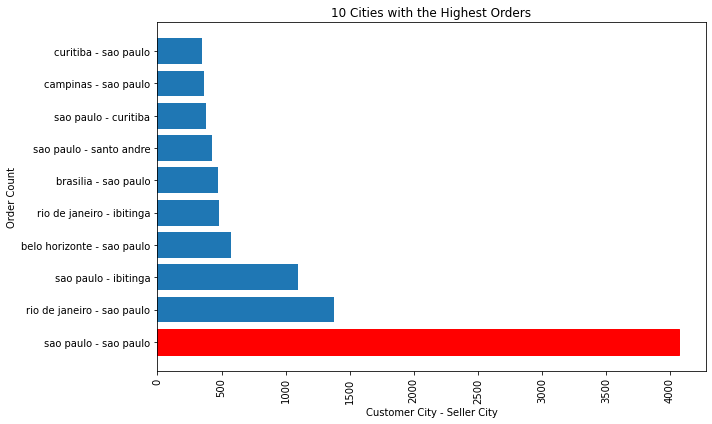

4074

In [92]:
# colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10,6))
bar = plt.barh(np.arange(len(persebaran_kota['distribusi'])), persebaran_kota['order_id'], tick_label=persebaran_kota['distribusi'])
maxval = max(persebaran_kota['order_id'])
bar[0].set_color('red')
plt.xlabel('Customer City - Seller City')
plt.ylabel('Order Count')
plt.title('10 Cities with the Highest Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
maxval

In [93]:
persebaran_negara = all_df.groupby(['customer_state', 'seller_state']).agg({
    'order_id' : 'nunique',
}).sort_values('order_id',ascending=False).reset_index().head(10)
distribusi_list = []
for customer, seller in zip(persebaran_negara['customer_state'],
                                   persebaran_negara['seller_state']):
    distribusi = f"{customer} - {seller}"
    distribusi_list.append(distribusi)
persebaran_negara['distribusi'] = distribusi_list
persebaran_negara

,customer_state,seller_state,order_id,distribusi
0,SP,SP,30829,SP - SP
1,RJ,SP,8189,RJ - SP
2,MG,SP,7470,MG - SP
3,RS,SP,3613,RS - SP
4,PR,SP,3130,PR - SP
5,SP,PR,2958,SP - PR
6,SP,MG,2578,SP - MG
7,SC,SP,2336,SC - SP
8,BA,SP,2313,BA - SP
9,MG,MG,1539,MG - MG


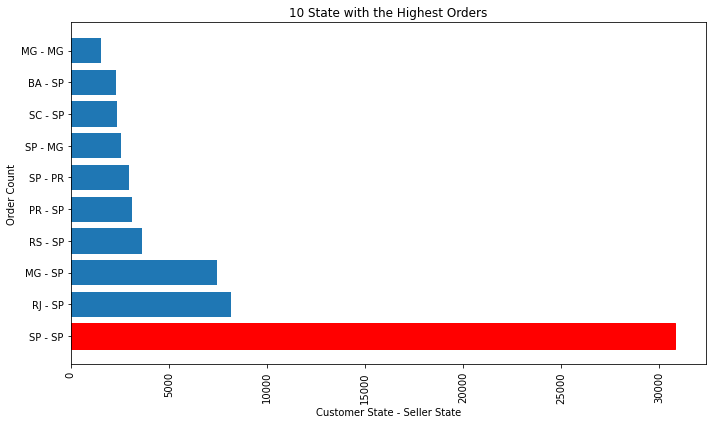

In [94]:
plt.figure(figsize=(10,6))
bar = plt.barh(np.arange(len(persebaran_negara['distribusi'])), persebaran_negara['order_id'], tick_label=persebaran_negara['distribusi'])
bar[0].set_color('red')
plt.xlabel('Customer State - Seller State')
plt.ylabel('Order Count')
plt.title('10 State with the Highest Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Question 2 : Perkembangan Order Dalam Sebulan Terakhir

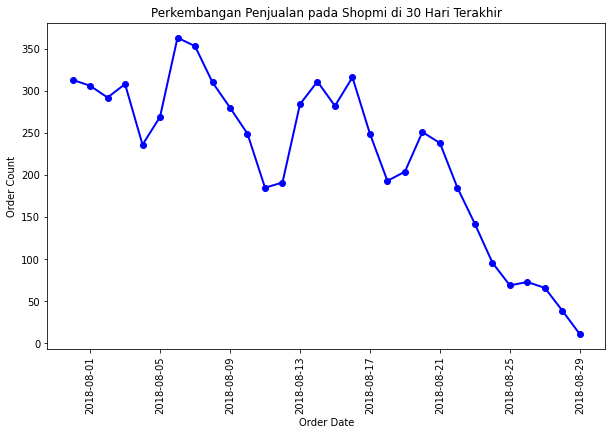

,order_purchase_timestamp,order_id
0,2018-07-31,313
1,2018-08-01,306
2,2018-08-02,292
3,2018-08-03,308
4,2018-08-04,236
5,2018-08-05,269
6,2018-08-06,363
7,2018-08-07,353
8,2018-08-08,310
9,2018-08-09,280


In [95]:
perkembangan = penjualan.groupby('order_purchase_timestamp').agg({
    'order_id' : 'nunique',
}).sort_values('order_purchase_timestamp', ascending=False).head(30)
# perkembangan.index = perkembangan.index.strftime('%d-%M-%Y')
plt.figure(figsize=(10,6))
plt.plot(perkembangan.index, perkembangan['order_id'], marker='o', linewidth=2, color='blue')

plt.xlabel('Order Date')
plt.ylabel('Order Count')
plt.title('Perkembangan Penjualan pada Shopmi di 30 Hari Terakhir')
plt.xticks(rotation=90)
plt.show()
perkembangan.sort_values('order_purchase_timestamp', ascending=True).reset_index()

### Question 3 : 10 Category Product with high Review Mean Score

In [96]:
review_order = penjualan.groupby('product_category_name').agg({
    'review_score' :  'mean'
}).sort_values('review_score', ascending=False).reset_index().head(10)

review_order

,product_category_name,review_score
0,fashion_roupa_infanto_juvenil,5.000000
1,cds_dvds_musicais,4.642857
2,livros_interesse_geral,4.514925
3,livros_importados,4.508772
4,construcao_ferramentas_ferramentas,4.466019
5,flores,4.454545
6,portateis_casa_forno_e_cafe,4.438356
7,livros_tecnicos,4.396226
8,alimentos_bebidas,4.369004
9,fashion_esporte,4.366667


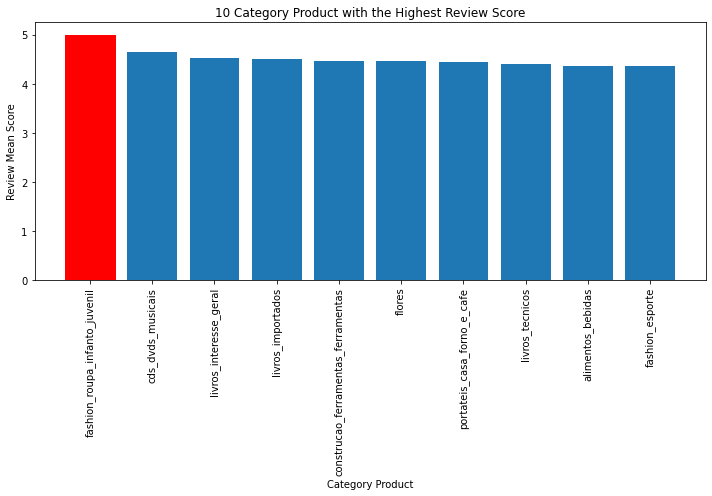

In [97]:
plt.figure(figsize=(10,7))
bar = plt.bar(review_order['product_category_name'], review_order['review_score'], tick_label=review_order['product_category_name'])
bar[0].set_color('red')
plt.xlabel('Category Product')
plt.ylabel('Review Mean Score')
plt.title('10 Category Product with the Highest Review Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Question 4 : Delivery Status 

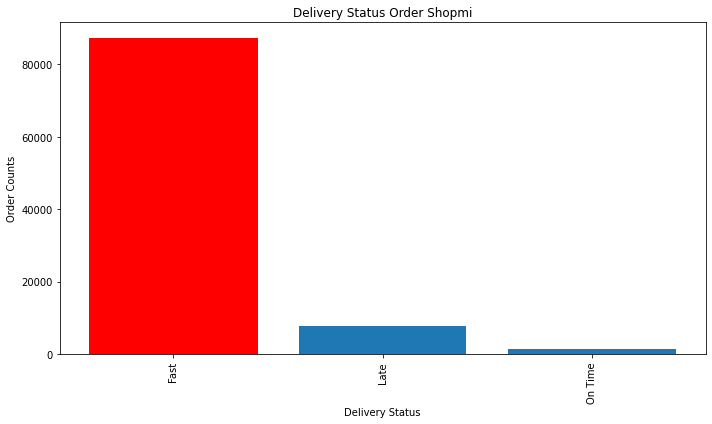

In [98]:
delivery_status = penjualan.groupby('delivery_status').agg({
    'order_id' : 'nunique',
})
plt.figure(figsize=(10,6))
bar = plt.bar(np.arange(len(delivery_status.index)), delivery_status['order_id'], tick_label=delivery_status.index)
bar[0].set_color('red')
plt.xlabel('Delivery Status')
plt.ylabel('Order Counts')
plt.title('Delivery Status Order Shopmi')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

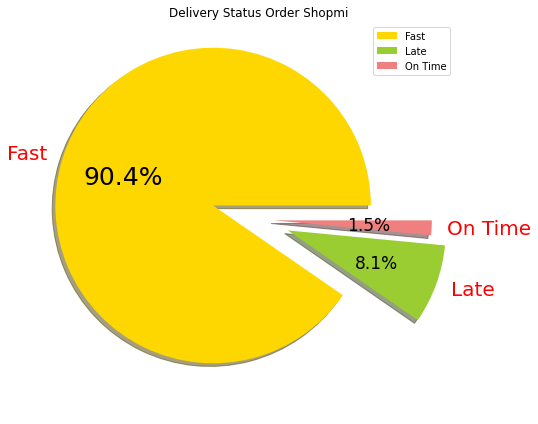

In [99]:
delivery_status = penjualan.groupby('delivery_status').agg({
    'order_id' : 'nunique',
})
plt.figure(figsize=(10,6))
explode = (0.3, 0.2, 0.1)  
colors = ['gold', 'yellowgreen', 'lightcoral']
_, texts, auto = plt.pie(delivery_status['order_id'], explode=explode, labels=delivery_status.index, colors = colors,
       autopct='%1.1f%%', shadow=True)
for text in texts:
    text.set_color('red')
    text.set_fontsize(20)
    
auto[0].set_fontsize(25)
auto[1].set_fontsize(17)
auto[2].set_fontsize(17)

plt.title('Delivery Status Order Shopmi')
# plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(delivery_status.index, loc='upper right')

plt.show()


### 5. Kesimpulan
1. Selama pemesanan berlangsung, transaksi yang dilakukan terbanyak adalah customer dari **Sao Paulo** dan seller dari  **Sao Paulo** dengan jumlah order sebanyak 4074 order

2. Selama sebulan terakhir, Shopmi mengalami **Penurunan Order** dari awal bulan berkisar **313**, hingga akhir bulan mencapai **11** pesanan.

3. Kategori produk terbaik dengan review tertinggi adalah kategori **Fashion Roupa Infanto Juvenil** dengan rata2 rating adalah 5.

4. Hingga saat ini, performa delivery order Shopmi mencapai **90%** Cepat (Fast) dalam mengantarkan order nya kepada Customer.

In [100]:
import streamlit as st
import matplotlib
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(st.__version__)

2.0.3
1.23.1
3.7.5
1.25.0
